# SMS Spam classifier
In this notebook, I will be building a SMS spam classifier. The dataset used in this notebook is the SMS Spam Collection dataset from the UCI Machine Learning Repository. The dataset contains 5572 SMS messages that are labeled as either spam or ham (not spam). The goal of this notebook is to build a model that can accurately classify SMS messages as spam or ham.
This will be divided into followign steps:
- Data Cleaning
- EDA
- Text Preprocessing
- Trying different models
- Deciding final model
- Make pipeline
- Evaluate pipeline
- Export pipeline


## Step 0 : Importing the libraries and dataset

In [1]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('spam.csv', encoding='latin1')
print(df.sample(10))
print("\n\n\n\n\n")
print(df.shape)

        v1                                                 v2 Unnamed: 2  \
2829   ham                            Howz that persons story        NaN   
5005   ham                                    ILL B DOWN SOON        NaN   
2687   ham                                               Okie        NaN   
3082   ham             K..k:)how about your training process?        NaN   
251    ham  Wen ur lovable bcums angry wid u, dnt take it ...        NaN   
997    ham  Not a lot has happened here. Feels very quiet....        NaN   
2416   ham    Could you not read me, my Love ? I answered you        NaN   
606   spam  XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...        NaN   
1373  spam  Bears Pic Nick, and Tom, Pete and ... Dick. In...        NaN   
2028   ham             Kallis is ready for bat in 2nd innings        NaN   

     Unnamed: 3 Unnamed: 4  
2829        NaN        NaN  
5005        NaN        NaN  
2687        NaN        NaN  
3082        NaN        NaN  
251         NaN   

## Step 1 : Data Cleaning

### Getting overview of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Dropping almost empty columns

In [4]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1': 'label', 'v2': 'text'})
print(df.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


### encoding the label

In [5]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.sample(10)

,label,text
4321,0,Sorry . I will be able to get to you. See you ...
4587,0,I wanted to wish you a Happy New Year and I wa...
830,1,U have a secret admirer. REVEAL who thinks U R...
69,0,I plane to give on this month end.
2338,0,"Alright, see you in a bit"
1995,0,Shall i come to get pickle
3321,0,Ok darlin i supose it was ok i just worry too ...
227,0,Hey company elama po mudyadhu.
1627,1,You have been selected to stay in 1 of 250 top...
1976,0,Lol alright i was thinkin that too haha


### Removing duplicates

In [6]:
print(df.duplicated().sum())
df = df.drop_duplicates(keep='first')
print(df.duplicated().sum())

403
0


## Step 2 : EDA

### Visualizing the distribution of the target variable

In [7]:
df.label.value_counts()

label
0    4516
1     653
Name: count, dtype: int64

<Axes: ylabel='count'>

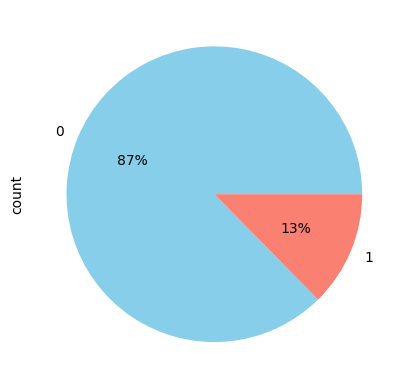

In [8]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['skyblue', 'salmon'])


according to above pie chart our data has more number of ham messages than spam messages we should keep this in mind since this can make our model biased towards ham messages.

### Making some new columns to analyze the data
- Length of the message
- Number of words in the message
- Number of Sentence in the message

In [9]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
df['num_characters']=df.text.apply(len)
df.sample(5)

,label,text,num_characters
2530,0,So the sun is anti sleep medicine.,34
3101,0,Even if he my friend he is a priest call him now,48
2696,0,Nope but i'm going home now then go pump petro...,80
1146,0,Babe ? I lost you ... :-(,25
520,0,But that's on ebay it might be less elsewhere.,46


In [11]:
df['text']=df['text'].apply(lambda x: nltk.word_tokenize(x))
df.head(5)

,label,text,num_characters
0,0,"[Go, until, jurong, point, ,, crazy, .., Avail...",111
1,0,"[Ok, lar, ..., Joking, wif, u, oni, ...]",29
2,1,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",155
3,0,"[U, dun, say, so, early, hor, ..., U, c, alrea...",49
4,0,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",61


In [12]:
df['num_words'] = df.text.apply(lambda x: len(x))
df.head(5)

,label,text,num_characters,num_words
0,0,"[Go, until, jurong, point, ,, crazy, .., Avail...",111,24
1,0,"[Ok, lar, ..., Joking, wif, u, oni, ...]",29,8
2,1,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",155,37
3,0,"[U, dun, say, so, early, hor, ..., U, c, alrea...",49,13
4,0,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",61,15


In [13]:
df['num_sentences'] = df.text.apply(lambda x: len(nltk.sent_tokenize(' '.join(x))))
df.head(5)

,label,text,num_characters,num_words,num_sentences
0,0,"[Go, until, jurong, point, ,, crazy, .., Avail...",111,24,2
1,0,"[Ok, lar, ..., Joking, wif, u, oni, ...]",29,8,2
2,1,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",155,37,2
3,0,"[U, dun, say, so, early, hor, ..., U, c, alrea...",49,13,1
4,0,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",61,15,1


In [14]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,2.015670
std,58.236293,13.324758,1.521119
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,117.000000,26.000000,3.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

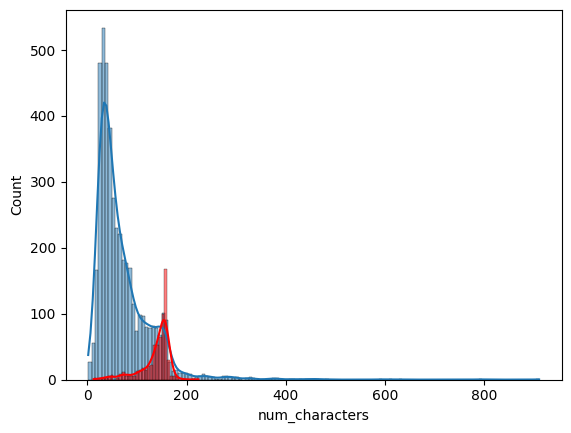

In [15]:
import seaborn as sns

sns.histplot(df[df.label==0]['num_characters'], kde=True)
sns.histplot(df[df.label==1]['num_characters'], kde=True,color='red')

<Axes: xlabel='num_words', ylabel='Count'>

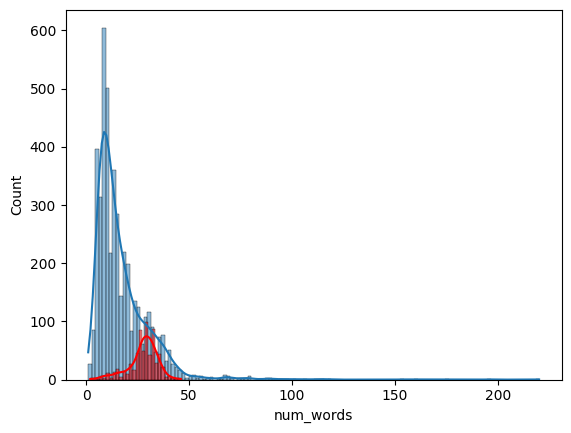

In [16]:
sns.histplot(df[df.label==0]['num_words'], kde=True)
sns.histplot(df[df.label==1]['num_words'], kde=True,color='red')

From the above graph we can clearly see that the spam messages are longer than ham messages.

### Checking co-relation between the new columns

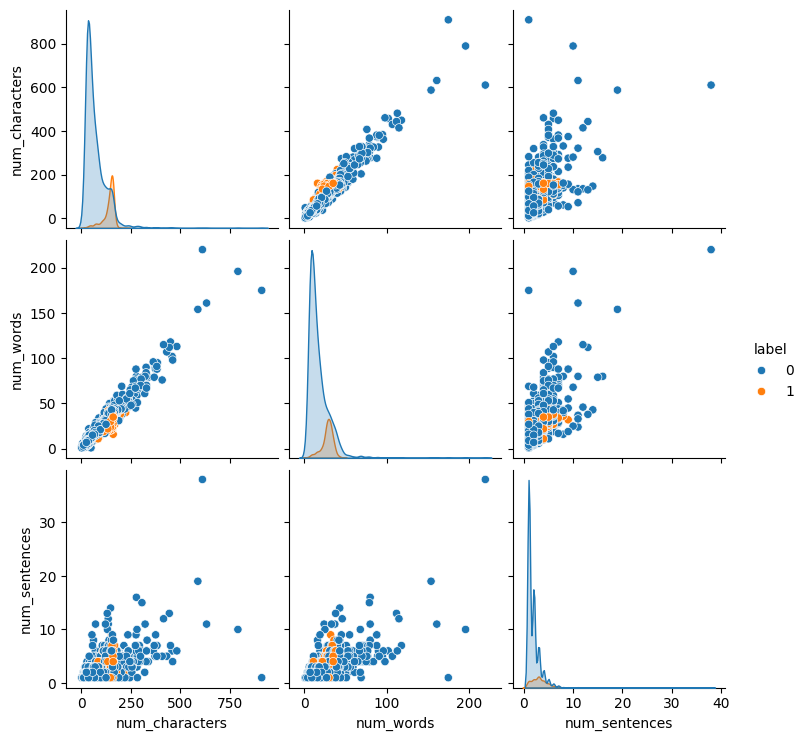

In [17]:
# checking relation between columns
sns.pairplot(df, hue='label')

<Axes: >

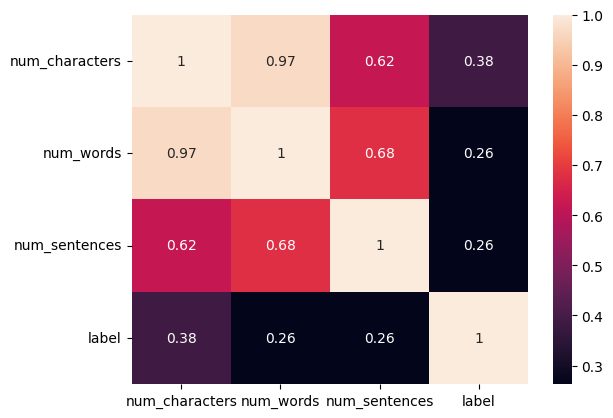

In [18]:
numeric_df = df[['num_characters', 'num_words', 'num_sentences', 'label']]
sns.heatmap(numeric_df.corr(), annot=True)


## Step 3 : Text Preprocessing
- Converting to lower case
- Tokenization
- Removing special characters
- Removing stopwords
- stemming

In [19]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def transform_text(text):
    ps=PorterStemmer()
    text=text.lower()
    text=nltk.word_tokenize(text)
    text=[word for word in text if word.isalnum()]
    stop_words=set(stopwords.words('english'))
    text=[ps.stem(word) for word in text if word not in stop_words]
    return " ".join(text)

print(transform_text('Hello! How are you? dancing %%%'))

hello danc


In [20]:
df['transformed_text']=df.text.apply(lambda x: transform_text(' '.join(x)))
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"[Go, until, jurong, point, ,, crazy, .., Avail...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,"[Ok, lar, ..., Joking, wif, u, oni, ...]",29,8,2,ok lar joke wif u oni
2,1,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,"[U, dun, say, so, early, hor, ..., U, c, alrea...",49,13,1,u dun say earli hor u c alreadi say
4,0,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",61,15,1,nah think goe usf live around though


### Applying some more EDA on processed text

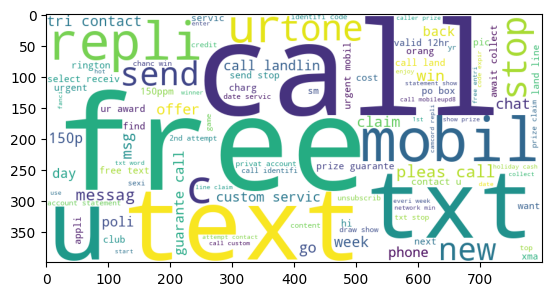

In [21]:
from wordcloud import WordCloud
wc=WordCloud(width=800, height=400, min_font_size=10, max_words=100,background_color='white')
spam_wc=wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

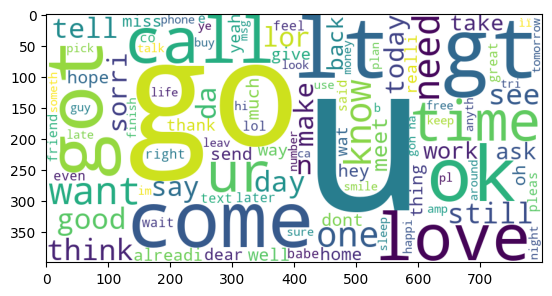

In [22]:
ham_wc=wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc)

## Step 4 : Try differnet models
here we will try following models:
- MultinomialNB
- BernoulliNB
- GaussianNB

### using count vectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv=CountVectorizer()
X=cv.fit_transform(df['transformed_text']).toarray()

In [24]:
X.shape

(5169, 6750)

In [25]:
y=df['label'].values
y.shape

(5169,)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [28]:
gnb.fit(X_train, y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8771760154738878
[[774 111]
 [ 16 133]]
0.5450819672131147


In [29]:
mnb.fit(X_train, y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.971953578336557
[[870  15]
 [ 14 135]]
0.9


In [30]:
bnb.fit(X_train, y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))


0.9661508704061895
[[882   3]
 [ 32 117]]
0.975


### using tfidf vectorizer

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [32]:
y=df['label'].values
y.shape

(5169,)

In [33]:
print(X.shape)
print(y.shape)

(5169, 6750)
(5169,)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [36]:
gnb.fit(X_train, y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8723404255319149
[[774 111]
 [ 21 128]]
0.5355648535564853


In [37]:
mnb.fit(X_train, y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9468085106382979
[[885   0]
 [ 55  94]]
1.0


In [38]:
bnb.fit(X_train, y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))


0.9661508704061895
[[882   3]
 [ 32 117]]
0.975


After seeing the results of both the models, we can see that the tfidf vectorizer model is performing better than the count vectorizer model. So, we will use the tfidf vectorizer model for our final model along with multinomial naive bayes classifier as our final model.

## Step 5 : Making final model 
Now we will make the final model using the tfidf vectorizer and multinomial naive bayes classifier with a little bit of hyperparameter tuning.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y=df['label'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=2)

mnb=MultinomialNB()
mnb.fit(X_train, y_train)
y_pred=mnb.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


Here after reducing the number of columns we can see that the accuracy of the model has increased.

## Step 6 : Making pipeline

In [48]:
import nltk
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.model_selection import train_test_split

# Ensure you have downloaded the required resources for NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Custom transformer class for text preprocessing
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def transform_text(self,text):
        ps = nltk.stem.PorterStemmer()
        text = text.lower()
        text = nltk.word_tokenize(text)
        text = [word for word in text if word.isalnum()]  # Keep alphanumeric words
        stop_words = set(nltk.corpus.stopwords.words('english'))
        text = [ps.stem(word) for word in text if word not in stop_words]  # Stemming and stopword removal
        return " ".join(text)
    def __init__(self,):
        self.custom_func = self.transform_text
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Apply the custom text transformation function to each element in X
        return [self.custom_func(text) for text in X]

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', TextPreprocessor()),  # Custom preprocessing step
    ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF features
    ('classifier', MultinomialNB())  # Multinomial Naive Bayes for classification
])

# Getting the data
df=pd.read_csv('spam.csv', encoding='latin1')
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1': 'label', 'v2': 'text'})
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# train test split
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)



# Train the pipeline with the example data
pipeline.fit(X_train, y_train)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Pipeline(steps=[('preprocessor', TextPreprocessor()),
                ('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

## Step 7:  Evaluating pipeline

In [41]:
y_pred = pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))


0.9551569506726457
[[957   0]
 [ 50 108]]
1.0


## Step 8: Exporting models

In [49]:
import dill

# Saving the pipeline with dill
with open('model.pkl', 'wb') as f:
    dill.dump(pipeline, f)




# Using the model

In [44]:
import dill
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load the model
with open('model.pkl', 'rb') as f:
    model = dill.load(f)

# Test the model with a custom message
message = input("Enter a message: ")
prediction=int(pipeline.predict([message])[0])
if prediction == 1:
    print("Spam")
else:
    print("Not Spam")

Not Spam
